# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rafi Yusuf Permana
- **Email:** rafiyusuf337@gmail.com
- **ID Dicoding:** MS171D5Y0599

## Menentukan Pertanyaan Bisnis

- Jam berapa peminjaman sepeda paling tinggi dalam sehari?
- Apakah orang lebih sering menyewa sepeda saat akhir pekan di pagi hari dibandingkan hari biasa?
- Apakah tren peminjaman berbeda antara bulan-bulan tertentu dalam setahun?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
days_df = pd.read_csv("day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hours_df = pd.read_csv("hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai tabel days_df

In [7]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Menilai tabel hours_df

In [8]:
days_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
print("Statistik Deskriptif Dataset Harian:")
days_df.describe()

Statistik Deskriptif Dataset Harian:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel hours_df

In [11]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hours_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [13]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
print("Statistik Deskriptif Dataset Per Jam")
hours_df.describe()

Statistik Deskriptif Dataset Per Jam


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### **Cleaning Data**

Membersihkan tabel days_df

In [15]:
days_df["dteday"] = pd.to_datetime(days_df["dteday"])
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Membersihkan tabel hours_df

In [16]:
hours_df["dteday"] = pd.to_datetime(hours_df["dteday"])
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

### **Exploratory Data Analysis(EDA)**

Explore days_df

In [17]:
# Menambahkan kolom untuk menentukan apakah hari tersebut adalah akhir pekan
hours_df["is_weekend"] = hours_df["weekday"].apply(lambda x: 1 if x in [0, 6] else 0)  # 0: Minggu, 6: Sabtu

In [18]:
days_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
115,116,2011-04-26,2,0,4,0,2,1,1,0.631667,0.594083,0.729167,0.326500,678,3722,4400
451,452,2012-03-27,2,1,3,0,2,1,1,0.323333,0.315654,0.290000,0.187192,531,4571,5102
170,171,2011-06-20,2,0,6,0,1,1,2,0.635000,0.595346,0.746250,0.155475,699,3311,4010
74,75,2011-03-16,1,0,3,0,3,1,2,0.365217,0.366930,0.776522,0.203117,321,1871,2192
396,397,2012-02-01,1,1,2,0,3,1,1,0.469167,0.466538,0.507917,0.189067,304,4275,4579


In [19]:
print("Statistik Deskriptif Data Harian:")
days_df.describe(include="all")

Statistik Deskriptif Data Harian:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Explore hours_df


In [20]:
hours_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_weekend
4271,4272,2011-07-01,3,0,7,21,0,5,1,1,0.70,0.6364,0.45,0.1940,69,149,218,0
16013,16014,2012-11-04,4,1,11,22,0,0,0,1,0.30,0.2879,0.52,0.2836,15,64,79,1
5767,5768,2011-09-02,3,0,9,18,0,5,1,2,0.68,0.6364,0.65,0.1940,50,305,355,0
2783,2784,2011-04-30,2,0,4,21,0,6,0,1,0.44,0.4394,0.62,0.1343,58,119,177,1
10927,10928,2012-04-05,2,1,4,11,0,4,1,2,0.42,0.4242,0.38,0.2239,109,159,268,0


In [21]:
print("Statistik Deskriptif Data per Jam:")
hours_df.describe(include="all")

Statistik Deskriptif Data per Jam:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_weekend
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.288509
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,1.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.453082


**Explore all data**

Menghubungkan semua data

In [22]:
# Konversi tanggal ke format datetime
days_df["dteday"] = pd.to_datetime(days_df["dteday"])
hours_df["dteday"] = pd.to_datetime(hours_df["dteday"])

# ini adalah kolom yang digunakan untuk menggabungkan data
common_cols = ["dteday", "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

# mengabungkan dataset berdasarkan kolom yang sama
merged_df = hours_df.merge(days_df, on=common_cols, suffixes=("_hour", "_day"))

# menyimpan hasil ke dalamfile CSV
merged_df.to_csv("merged_data.csv", index=False)

merged_df.head()

,instant_hour,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,cnt_hour,is_weekend,instant_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,6,2011-01-01,1,0,1,5,0,6,0,2,...,1,1,1,0.344167,0.363625,0.805833,0.160446,331,654,985
1,14,2011-01-01,1,0,1,13,0,6,0,2,...,94,1,1,0.344167,0.363625,0.805833,0.160446,331,654,985
2,15,2011-01-01,1,0,1,14,0,6,0,2,...,106,1,1,0.344167,0.363625,0.805833,0.160446,331,654,985
3,16,2011-01-01,1,0,1,15,0,6,0,2,...,110,1,1,0.344167,0.363625,0.805833,0.160446,331,654,985
4,17,2011-01-01,1,0,1,16,0,6,0,2,...,93,1,1,0.344167,0.363625,0.805833,0.160446,331,654,985


### **Visualization & Explanatory Analysis**

### pertanyaan 1:

In [23]:
# Grupkan data berdasarkan jam dan hitung rata-rata jumlah peminjaman sepeda
hourly_rentals = hours_df.groupby("hr")["cnt"].mean()

<ipython-input-24-4916377c095d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_rentals.index, y=hourly_rentals.values, palette="Blues_r")


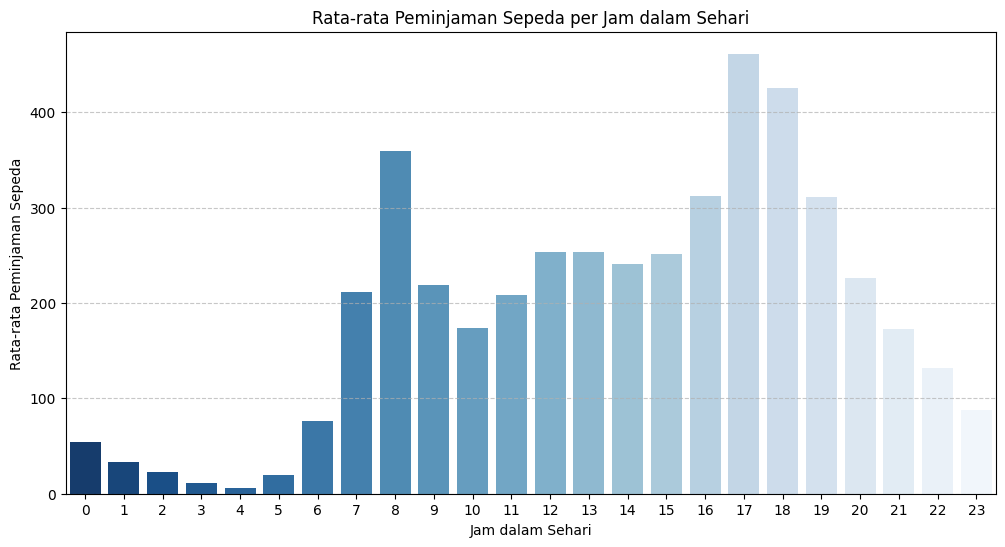

In [24]:
# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_rentals.index, y=hourly_rentals.values, palette="Blues_r")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Rata-rata Peminjaman Sepeda per Jam dalam Sehari")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [25]:
# Menentukan jam dengan peminjaman tertinggi
max_hour = hourly_rentals.idxmax()
print(f"Peminjaman sepeda paling tinggi terjadi pada jam {max_hour}:00.")

Peminjaman sepeda paling tinggi terjadi pada jam 17:00.


### pertanyaan 2:

Apakah orang lebih sering menyewa sepeda saat akhir pekan di pagi hari dibandingkan hari biasa?

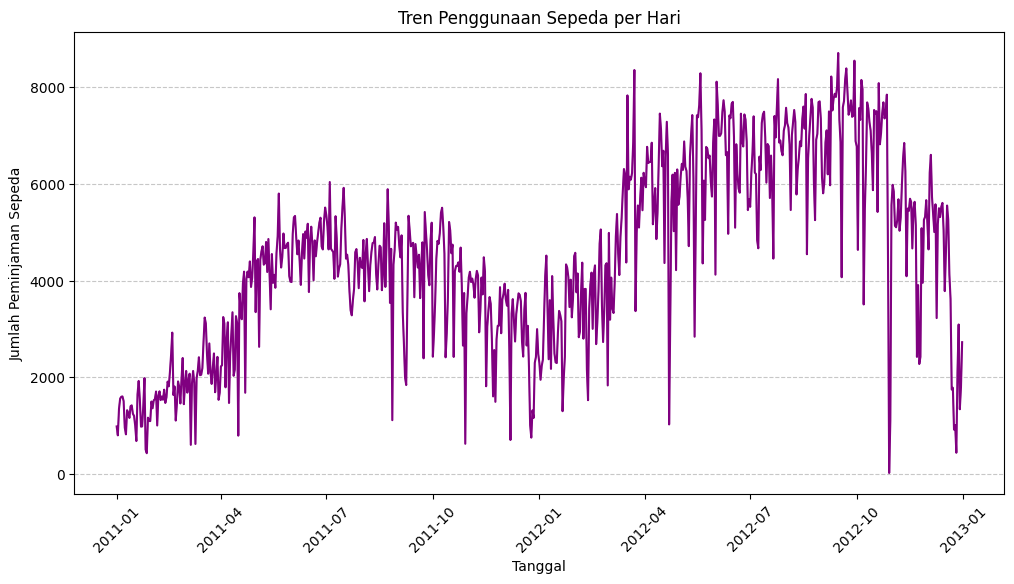

In [33]:
# visualisasi data perhari
plt.figure(figsize=(12, 6))
sns.lineplot(x=merged_df["dteday"], y=merged_df["cnt_day"], color="purple")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Tren Penggunaan Sepeda per Hari")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [27]:
# Filter data untuk pagi hari (jam 6-9)
morning_rentals = hours_df[(hours_df["hr"] >= 6) & (hours_df["hr"] <= 9)]

# Hitung rata-rata peminjaman pagi hari pada akhir pekan dan hari biasa
weekend_morning_avg = morning_rentals[hours_df["is_weekend"] == 1]["cnt"].mean()
weekday_morning_avg = morning_rentals[hours_df["is_weekend"] == 0]["cnt"].mean()

<ipython-input-27-d3eba1eba044>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weekend_morning_avg = morning_rentals[hours_df["is_weekend"] == 1]["cnt"].mean()
<ipython-input-27-d3eba1eba044>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weekday_morning_avg = morning_rentals[hours_df["is_weekend"] == 0]["cnt"].mean()


<ipython-input-34-ea510ef38fb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Hari Biasa", "Akhir Pekan"], y=[weekday_morning_avg, weekend_morning_avg], palette=["green", "yellow"])


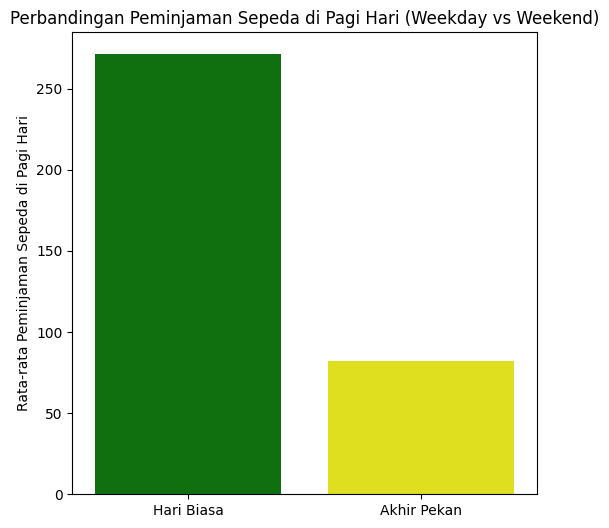

In [34]:
# Visualisasi
plt.figure(figsize=(6, 6))
sns.barplot(x=["Hari Biasa", "Akhir Pekan"], y=[weekday_morning_avg, weekend_morning_avg], palette=["green", "yellow"])
plt.ylabel("Rata-rata Peminjaman Sepeda di Pagi Hari")
plt.title("Perbandingan Peminjaman Sepeda di Pagi Hari (Weekday vs Weekend)")
plt.show()

In [29]:
# Menentukan kesimpulan
if weekend_morning_avg > weekday_morning_avg:
    print(f"Orang lebih sering menyewa sepeda saat akhir pekan di pagi hari dengan rata-rata {weekend_morning_avg:.2f} peminjaman, dibandingkan hari biasa yang hanya {weekday_morning_avg:.2f}.")
else:
    print(f"Orang lebih sering menyewa sepeda di pagi hari pada hari biasa ({weekday_morning_avg:.2f}) dibandingkan akhir pekan ({weekend_morning_avg:.2f}).")


Orang lebih sering menyewa sepeda di pagi hari pada hari biasa (271.21) dibandingkan akhir pekan (82.19).


### pertanyaan 3:

In [30]:
# ini adakah cara membuat kolom 'mnth' untuk mewakili bulan
bulan_mapping = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "Mei", 6: "Jun",
    7: "Jul", 8: "Agu", 9: "Sep", 10: "Okt", 11: "Nov", 12: "Des"
}
days_df['bulan'] = days_df['mnth'].map(bulan_mapping)

# menghitung jumlah peminjaman per bulan
monthly_rentals = days_df.groupby('bulan')['cnt'].sum().reset_index()

In [31]:
# kode di bawah ini untuk mengurutkan bulan sesuai kalender
order_bulan = ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"]
monthly_rentals['bulan'] = pd.Categorical(monthly_rentals['bulan'], categories=order_bulan, ordered=True)
monthly_rentals = monthly_rentals.sort_values('bulan')

<ipython-input-32-e787d9c8e21f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_rentals, x='bulan', y='cnt', palette='coolwarm')


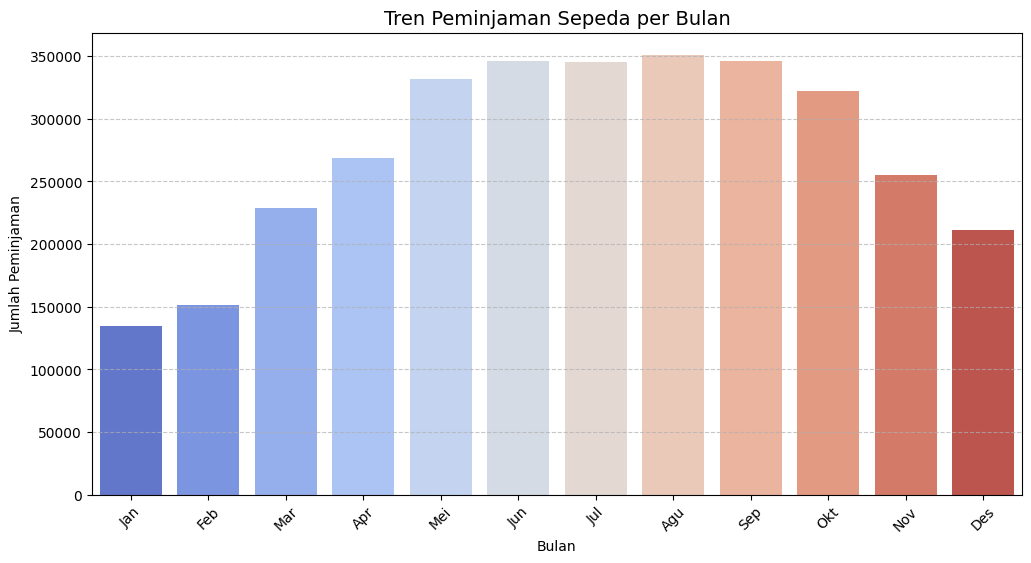

In [32]:
# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_rentals, x='bulan', y='cnt', palette='coolwarm')

plt.title("Tren Peminjaman Sepeda per Bulan", fontsize=14)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()